[View in Colaboratory](https://colab.research.google.com/github/rohit221991/loan_prediction/blob/master/loan_prediction.ipynb)

# **Loan prediction**

In [43]:
# Load relevant packages
import numpy as np
np.random.seed(42)

import pandas as pd

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import xgboost as xgb

Exception ignored in: <bound method DMatrix.__del__ of <xgboost.core.DMatrix object at 0x1a1e5199e8>>
Traceback (most recent call last):
  File "/Users/rohitgupta/anaconda3/lib/python3.6/site-packages/xgboost/core.py", line 368, in __del__
    if self.handle is not None:
AttributeError: 'DMatrix' object has no attribute 'handle'


In [44]:
DATA_FOLDER = '/Users/rohitgupta/workspace/projects/ml/loan_predicition/data/'
df = pd.read_csv(DATA_FOLDER+"train.csv")
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [45]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


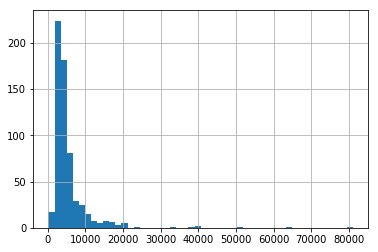

In [46]:
df['ApplicantIncome'].hist(bins=50)

In [47]:
df.apply(lambda x: sum(x.isnull()),axis=0) 

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [48]:
X = df.ix[:, df.columns != 'Loan_Status']
y = df['Loan_Status']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


/Users/rohitgupta/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


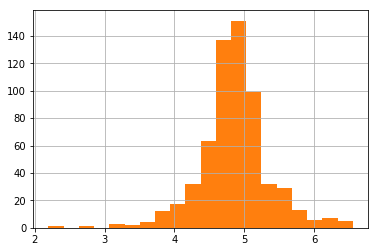

In [49]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)
df['Self_Employed'].fillna('No',inplace=True)
table = df.pivot_table(values='LoanAmount', index='Self_Employed' ,columns='Education', aggfunc=np.median)
# Define function to return value of this pivot_table
def fage(x):
 return table.loc[x['Self_Employed'],x['Education']]
# Replace missing values
df['Self_Employed'].fillna('No',inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)
df['LoanAmount_log'] = np.log(df['LoanAmount'])
df['LoanAmount_log'].hist(bins=20)
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['TotalIncome_log'] = np.log(df['TotalIncome'])
df['LoanAmount_log'].hist(bins=20) 
df['Gender'].fillna('Male', inplace=True)
df['Married'].fillna('NO', inplace=True)

In [50]:
del df['Loan_ID']

In [52]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i].astype(str))
df.dtypes 


Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
LoanAmount_log       float64
TotalIncome          float64
TotalIncome_log      float64
dtype: object

In [53]:
# Split data
train, test = train_test_split(df, test_size = 0.3, random_state = 42)
y_train = train.pop('Loan_Status')
y_test = test.pop('Loan_Status')
X_train = train
X_test = test

In [54]:
# Train xgboost
dtrain = xgb.DMatrix(X_train, y_train)
dtest = xgb.DMatrix(X_test, y_test)
param = {'max_depth' : 3, 'eta' : 0.1, 'objective' : 'binary:logistic', 'seed' : 42}
num_round = 50
bst = xgb.train(param, dtrain, num_round, [(dtest, 'test'), (dtrain, 'train')])

[0]	test-error:0.227027	train-error:0.167832
[1]	test-error:0.227027	train-error:0.167832
[2]	test-error:0.227027	train-error:0.167832
[3]	test-error:0.227027	train-error:0.167832
[4]	test-error:0.227027	train-error:0.167832
[5]	test-error:0.227027	train-error:0.167832
[6]	test-error:0.227027	train-error:0.167832
[7]	test-error:0.227027	train-error:0.167832
[8]	test-error:0.227027	train-error:0.167832
[9]	test-error:0.227027	train-error:0.167832
[10]	test-error:0.227027	train-error:0.167832
[11]	test-error:0.227027	train-error:0.167832
[12]	test-error:0.227027	train-error:0.167832
[13]	test-error:0.227027	train-error:0.167832
[14]	test-error:0.227027	train-error:0.167832
[15]	test-error:0.227027	train-error:0.167832
[16]	test-error:0.227027	train-error:0.167832
[17]	test-error:0.227027	train-error:0.167832
[18]	test-error:0.227027	train-error:0.167832
[19]	test-error:0.227027	train-error:0.167832
[20]	test-error:0.227027	train-error:0.167832
[21]	test-error:0.227027	train-error:0.16783

In [55]:
preds = bst.predict(dtest)
preds[preds > 0.5] = 1
preds[preds <= 0.5] = 0
print(accuracy_score(preds, y_test), 1 - accuracy_score(preds, y_test))

0.772972972972973 0.22702702702702704
